In [ ]:
# # http://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

/Users/kdalwani/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
len(X_train)

60000

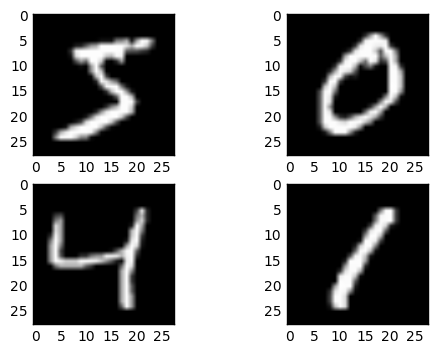

In [5]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## Baseline Model with Multi-Layer Perceptrons

In [ ]:
seed = 7
numpy.random.seed(seed)

In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [7]:
X_train.shape

(60000, 784)

In [8]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


In [9]:
y_train.shape

(60000,)

In [11]:

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [12]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [17]:
print y_train.shape
print num_pixels
print X_train.shape

(60000, 10)
784
(60000, 784)


In [15]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, init='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [18]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
3s - loss: 0.2797 - acc: 0.9214 - val_loss: 0.1386 - val_acc: 0.9585
Epoch 2/10
3s - loss: 0.1080 - acc: 0.9692 - val_loss: 0.0975 - val_acc: 0.9688
Epoch 3/10
3s - loss: 0.0696 - acc: 0.9797 - val_loss: 0.0772 - val_acc: 0.9778
Epoch 4/10
3s - loss: 0.0485 - acc: 0.9859 - val_loss: 0.0737 - val_acc: 0.9785
Epoch 5/10
3s - loss: 0.0360 - acc: 0.9898 - val_loss: 0.0683 - val_acc: 0.9781
Epoch 6/10
3s - loss: 0.0262 - acc: 0.9929 - val_loss: 0.0644 - val_acc: 0.9792
Epoch 7/10
3s - loss: 0.0190 - acc: 0.9952 - val_loss: 0.0625 - val_acc: 0.9800
Epoch 8/10
3s - loss: 0.0140 - acc: 0.9969 - val_loss: 0.0598 - val_acc: 0.9809
Epoch 9/10
3s - loss: 0.0102 - acc: 0.9980 - val_loss: 0.0591 - val_acc: 0.9826
Epoch 10/10
3s - loss: 0.0076 - acc: 0.9985 - val_loss: 0.0606 - val_acc: 0.9823
Baseline Error: 1.77%


In [20]:
scores = model.evaluate(X_test, y_test, verbose=2)
# Final evaluation of the model
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.77%


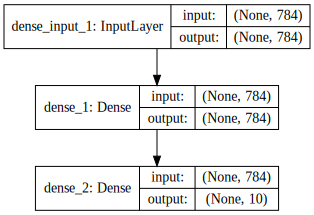

In [26]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Recognition using CNN 

In [28]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K


In [29]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [30]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [31]:
X_train.shape

(60000, 28, 28)

In [32]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [33]:
X_train.shape

(60000, 1, 28, 28)

In [34]:
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [35]:

def larger_model():
	# create model
	model = Sequential()
	model.add(Convolution2D(30, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Convolution2D(15, 3, 3, activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [40]:
# build the model
model = larger_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
94s - loss: 0.4055 - acc: 0.8718 - val_loss: 0.0896 - val_acc: 0.9729
Epoch 2/10
92s - loss: 0.1028 - acc: 0.9677 - val_loss: 0.0527 - val_acc: 0.9836
Epoch 3/10
93s - loss: 0.0735 - acc: 0.9768 - val_loss: 0.0410 - val_acc: 0.9858
Epoch 4/10
97s - loss: 0.0597 - acc: 0.9817 - val_loss: 0.0360 - val_acc: 0.9884
Epoch 5/10
94s - loss: 0.0514 - acc: 0.9839 - val_loss: 0.0283 - val_acc: 0.9912
Epoch 6/10
93s - loss: 0.0445 - acc: 0.9866 - val_loss: 0.0308 - val_acc: 0.9905
Epoch 7/10
92s - loss: 0.0393 - acc: 0.9870 - val_loss: 0.0268 - val_acc: 0.9902
Epoch 8/10
92s - loss: 0.0335 - acc: 0.9892 - val_loss: 0.0251 - val_acc: 0.9917
Epoch 9/10
93s - loss: 0.0321 - acc: 0.9896 - val_loss: 0.0273 - val_acc: 0.9912
Epoch 10/10
91s - loss: 0.0303 - acc: 0.9901 - val_loss: 0.0295 - val_acc: 0.9901
Baseline Error: 0.99%


['acc', 'loss', 'val_acc', 'val_loss']


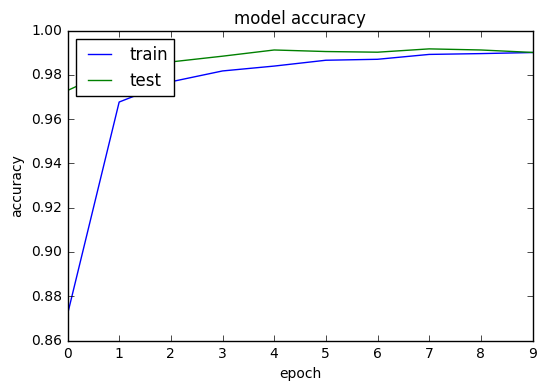

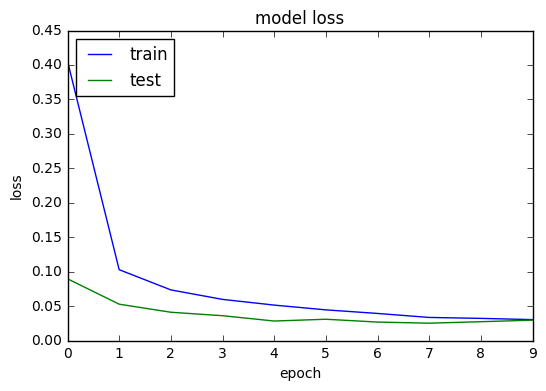

In [41]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Convolutional layer with 30 feature maps of size 5×5.
# Pooling layer taking the max over 2*2 patches.
# Convolutional layer with 15 feature maps of size 3×3.
# Pooling layer taking the max over 2*2 patches.
# Dropout layer with a probability of 20%.
# Flatten layer.
# Fully connected layer with 128 neurons and rectifier activation.
# Fully connected layer with 50 neurons and rectifier activation.
#Output layer.

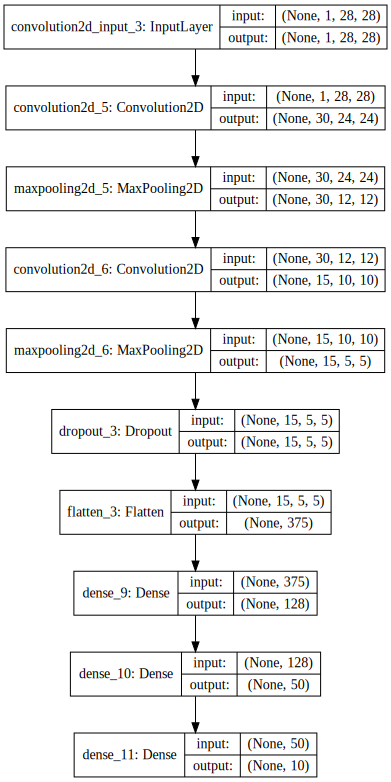

In [42]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))